In [1115]:
import pandas as pd
import matplotlib.pyplot as plt

from Performance import accuracy_calculator, accuracy_per_class_multi, calculate_performance_multi, calculate_performance_multi_averages, accuracy_per_class_multi_average
from GPTClassifier import gpt_classifier_35turbo_multi

In [1116]:
#Prediction_top_k
#Prediction_GPT4_Multi_Temp0
#Prediction_GPT35Turbo_Multi

In [1117]:
import pandas as pd
#df =pd.read_csv("ResultsMulti1901.csv")
df =pd.read_csv("Multiclassificationresults.csv")

In [1118]:
import pandas as pd
#df =pd.read_csv("ResultsMulti1901.csv")

#df.rename(columns={'Prediction_top_k': 'GPT35Finetuned'}, inplace=True)
#df.rename(columns={'Prediction_GPT4_Multi_Temp0': 'Prediction_GPT4_Temp0'}, inplace=True)

#df.rename(columns={'Prediction_GPT35Turbo_Multi': 'GPT35TurboBaseTemp0_Multi'}, inplace=True)


In [1119]:
df.ground_truth.value_counts() /len(df)

ground_truth
ADHD               0.532079
AUTISM             0.145423
BIPOLAR            0.115483
PTSD               0.108640
OCD                0.055603
EATING DISORDER    0.022241
SCHIZOPHRENIA      0.020530
Name: count, dtype: float64

In [1120]:
df.ground_truth.value_counts()

ground_truth
ADHD               622
AUTISM             170
BIPOLAR            135
PTSD               127
OCD                 65
EATING DISORDER     26
SCHIZOPHRENIA       24
Name: count, dtype: int64

In [1121]:
df["GPT35TurboBaseTemp0_Multi"] = df["GPT35TurboBaseTemp0_Multi"].apply(lambda x: x.split(':')[-1].strip() if ':' in x else x)

In [1122]:
df_acc = df

In [1123]:
percentage_of_total_values = 100/1053

Calculate Values within the prediction that were among the classified classes:

In [1124]:
accepted_values = ['PTSD', 'ADHD', 'AUTISM', 'BIPOLAR', 'SCHIZOPHRENIA', "EATING DISORDER","OCD"]

# Filter dataframe to only include rows where Condition is not in accepted_values
unclassified_data_gpt4 = len(df[~df['Prediction_GPT4_Temp0'].isin(accepted_values)]) * percentage_of_total_values
unclassified_data_gpt4

10.351377018043685

In [1125]:
accepted_values = ['PTSD', 'ADHD', 'AUTISM', 'BIPOLAR', 'SCHIZOPHRENIA', "EATING DISORDER","OCD"]

# Filter dataframe to only include rows where Condition is not in accepted_values
unclassified_data_gpt35ft = len(df[~df['GPT35Finetuned'].isin(accepted_values)]) * percentage_of_total_values
unclassified_data_gpt35ft

0.0949667616334283

In [1126]:
accepted_values = ['PTSD', 'ADHD', 'AUTISM', 'BIPOLAR', 'SCHIZOPHRENIA', "EATING DISORDER","OCD"]

# Filter dataframe to only include rows where Condition is not in accepted_values
unclassified_data_gpt35 = len(df[~df['GPT35TurboBaseTemp0_Multi'].isin(accepted_values)]) * percentage_of_total_values
unclassified_data_gpt35

37.8917378917379

In [1127]:
unclassified_list = [unclassified_data_gpt4, unclassified_data_gpt35ft, unclassified_data_gpt35]

In [1128]:
unclassified_data = pd.DataFrame({'Percentage unclassified data per multiclass model': unclassified_list}, index=["GPT4","GPT35FT","GPT35"])

In [1129]:

unclassified_data

,Percentage unclassified data per multiclass model
GPT4,10.351377
GPT35FT,0.094967
GPT35,37.891738


In [1130]:
gpt35ft = calculate_performance_multi_averages(df,"GPT35Finetuned" )
gpt4 = calculate_performance_multi_averages(df,"Prediction_GPT4_Temp0" )

PTSD
Precision  0.35294117647058826
Recall: 0.28346456692913385
F1 0.314410480349345
TPR 0.28346456692913385
FPR 0.06333973128598848
SCHIZOPHRENIA
Precision  0.3333333333333333
Recall: 0.2916666666666667
F1 0.3111111111111111
TPR 0.2916666666666667
FPR 0.01222707423580786
EATING DISORDER
Precision  0.4090909090909091
Recall: 0.34615384615384615
F1 0.37500000000000006
TPR 0.34615384615384615
FPR 0.011373578302712161
BIPOLAR
Precision  0.5
Recall: 0.23703703703703705
F1 0.32160804020100503
TPR 0.23703703703703705
FPR 0.030947775628626693
AUTISM
Precision  0.5566037735849056
Recall: 0.34705882352941175
F1 0.4275362318840579
TPR 0.34705882352941175
FPR 0.04704704704704705
OCD
Precision  1.0
Recall: 0.07692307692307693
F1 0.14285714285714288
TPR 0.07692307692307693
FPR 0.0
ADHD
Precision  0.6167452830188679
Recall: 0.8408360128617364
F1 0.7115646258503401
TPR 0.8408360128617364
FPR 0.5941499085923218
PTSD
Precision  0.18565400843881857
Recall: 0.3464566929133858
F1 0.24175824175824176
TPR 0

/Users/lukasschmidt/Desktop/Twitter/Performance.py:91: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  multi_df_results.loc[index] = (multi_df_results.loc[index] * percentages.loc[index][0])
/Users/lukasschmidt/Desktop/Twitter/Performance.py:91: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  multi_df_results.loc[index] = (multi_df_results.loc[index] * percentages.loc[index][0])


Extract the Unigram data from the University of Monterrey researcher data:

In [1131]:
prior = pd.read_csv("MexicanResearchDataMulti.csv", sep = ";")
prior.set_index("Models", inplace= True)
prior = prior[["Precision", "Recall", "F1"]]
prior = prior.loc["Unigram(U)"]
df1 = prior.to_frame()
df1 = df1

#df1[["Precision", "Recall", "F1"]]

In [1132]:
prior = pd.read_csv("MexicanResearchDataMulti.csv", sep = ";")
prior.set_index("Models", inplace= True)
prior

,AUC,F1,Precision,Recall
Models,,,,
Unigram(U),0.697,0.477,0.583,0.455
Bigram(B),0.608,0.284,0.305,0.288
Trigram(T),0.518,0.128,0.179,0.141
Word 123gram (UBT),0.694,0.470,0.557,0.448
Char 3gram (C3),0.650,0.379,0.438,0.371
Char 5gram(C5),0.684,0.440,0.535,0.426
Char 7gram (C7),0.680,0.447,0.534,0.423
POS unigram (POS_U),0.663,0.415,0.496,0.391
POS bigram (POS_B),0.551,0.195,0.269,0.196


In [1133]:
mex = prior

In [1134]:
 
gpt35ft.rename(columns={'Total': 'GPT35_FT_Temp0'}, inplace=True)
gpt35ft

gpt4.rename(columns={'Total': 'GPT4_Temp0'}, inplace=True)
gpt4

,GPT4_Temp0
Precision,0.527804
Recall,0.303678
F1,0.354197


In [1135]:
mex = pd.read_csv("MexicanResearchPerClass.csv", sep = ";", index_col= False).T
mex.columns = mex.iloc[0]
mex = mex.drop(mex.index[0])
mex = mex[[ "F1", "Precision", "Recall"]]
mex

Metric,F1,Precision,Recall
ADHD,0.751,0.662,0.867
AUTISM,0.524,0.596,0.476
BIPOLAR,0.534,0.516,0.565
EATING DISORDER,0.429,0.633,0.387
OCD,0.46,0.554,0.415
PTSD,0.533,0.58,0.497
SCHIZOPHRENIA,0.438,0.667,0.35


In [1136]:
macro_average_values = df.ground_truth.value_counts().to_frame()

In [1137]:
macro_average_values["count"] = macro_average_values["count"]/ 1053

In [1138]:
f1_macro_mex = sum(mex['F1'] * macro_average_values['count'])
precision_macro_mex = sum(mex['Precision'] * macro_average_values['count'])
recall_macro_mex = sum(mex['Recall'] * macro_average_values['count'])


In [1139]:
macro_data = [precision_macro_mex,recall_macro_mex, f1_macro_mex ]
df1 = pd.DataFrame({'Unigram(U)': macro_data})
df1.index = ["Precision","Recall", "F1"]

In [1140]:
df1 = df1
df2 = gpt4
df3 = gpt35ft

In [1141]:
df1

,Unigram(U)
Precision,0.688395
Recall,0.764506
F1,0.709923


In [1142]:
df2

,GPT4_Temp0
Precision,0.527804
Recall,0.303678
F1,0.354197


In [1143]:
df3

,GPT35_FT_Temp0
Precision,0.576731
Recall,0.573995
F1,0.534751


Plot the comparison of the models for multiclass with unigram:

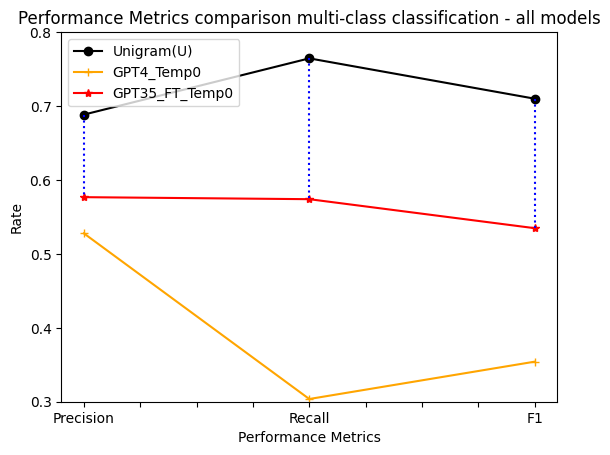

In [1144]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots()

# Plot first line on ax
df1.plot(kind='line', color='black', marker='o', label='Line 1', ax=ax) 

# Plot second line on same ax
df2.plot(kind='line', color='orange', marker='+', label='Line 2', ax=ax) 

df3.plot(kind='line', color='r', marker='*', label='Line 3', ax=ax) 


# Get the x and y data for each line
x1 = df1.index
y1 = df1.values
x2 = df3.index
y2 = df3.values

# Draw lines between each x tick
for i in range(len(x1)):
    ax.plot([x1[i], x2[i]], [y1[i], y2[i]], color='b',  linestyle=':')


# Add labels and legend
ax.set_title('Performance Metrics comparison multi-class classification - all models')
ax.set_xlabel('Performance Metrics')
ax.set_ylabel('Rate')
ax.set_ylim(0.3, 0.8)
ax.legend()
plt.savefig('performance_metrics_comparison_all.png')
plt.show()


In [1145]:
df2

,GPT4_Temp0
Precision,0.527804
Recall,0.303678
F1,0.354197


In [1146]:
df3

,GPT35_FT_Temp0
Precision,0.576731
Recall,0.573995
F1,0.534751


In [1147]:
df

,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,index,_id,sampled_tweets,ground_truth,true_disorder,Prediction_GPT35Turbo_Multi_TopP1,GPT35TurboBaseTemp0_Multi,Prediction_GPT4_Temp0,GPT35Finetuned,Disorder
0,0,0,0,0,0,0,0,0,0,0,1.423036e+09,"""@USER An absolute legend for this thank you!""...",PTSD,PTSD,NaN,DEPRESSION,DEPRESSION,BIPOLAR,PTSD
1,1,1,1,1,1,1,1,1,1,1,7.686502e+17,"""@USER PLEASE"";""@USER and I are gonna get matc...",PTSD,PTSD,NaN,DEPRESSION,PTSD,BIPOLAR,PTSD
2,2,2,2,2,2,2,2,2,2,2,1.160497e+18,"""@USER Thank you ️"";""@USER Youre so sweet and ...",PTSD,PTSD,NaN,ANXIETY,PTSD,ADHD,PTSD
3,3,3,3,3,3,3,3,3,3,3,1.468382e+18,"""woke up from a dream about one of my middle s...",PTSD,PTSD,NaN,PTSD,PTSD,PTSD,PTSD
4,4,4,4,4,4,4,4,4,4,4,9.996736e+17,"""By fascists they mean anyone who doesn't agre...",PTSD,PTSD,NaN,SCHIZOPHRENIA,PTSD,ADHD,PTSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,1164,1164,1164,1164,1164,1164,1164,1164,2541,2541,2.959316e+09,"""Sally 🤍🤍 we wont forget Angel. HTTPURL"";""@USE...",SCHIZOPHRENIA,SCHIZOPHRENIA,NaN,PTSD,SCHIZOPHRENIA,SCHIZOPHRENIA,SCHIZOPHRENIA
1165,1165,1165,1165,1165,1165,1165,1165,1165,2542,2542,8.529706e+17,"""I can literally feel more lesions developing ...",SCHIZOPHRENIA,SCHIZOPHRENIA,NaN,SCHIZOPHRENIA,"I'm sorry, but I cannot provide a diagnosis or...",ADHD,SCHIZOPHRENIA
1166,1166,1166,1166,1166,1166,1166,1166,1166,2543,2543,1.299459e+18,"""@USER he's so"";""@USER i dont rlly know how to...",SCHIZOPHRENIA,SCHIZOPHRENIA,NaN,SCHIZOPHRENIA,SCHIZOPHRENIA,SCHIZOPHRENIA,SCHIZOPHRENIA
1167,1167,1167,1167,1167,1167,1167,1167,1167,2544,2544,1.404918e+18,"""I like how my brother's friends always have h...",SCHIZOPHRENIA,SCHIZOPHRENIA,NaN,PTSD,SCHIZOPHRENIA,BIPOLAR,SCHIZOPHRENIA


In [1148]:
#df2 = df2.T
#df2["Accuracy"] =  accuracy_per_class_multi_average(df, "Prediction_GPT4_Temp0")
#df3 = df3.T
#df3["Accuracy"] = accuracy_per_class_multi_average(df, "GPT35_FT_Temp0")

In [1149]:
df_acc

,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,index,_id,sampled_tweets,ground_truth,true_disorder,Prediction_GPT35Turbo_Multi_TopP1,GPT35TurboBaseTemp0_Multi,Prediction_GPT4_Temp0,GPT35Finetuned,Disorder
0,0,0,0,0,0,0,0,0,0,0,1.423036e+09,"""@USER An absolute legend for this thank you!""...",PTSD,PTSD,NaN,DEPRESSION,DEPRESSION,BIPOLAR,PTSD
1,1,1,1,1,1,1,1,1,1,1,7.686502e+17,"""@USER PLEASE"";""@USER and I are gonna get matc...",PTSD,PTSD,NaN,DEPRESSION,PTSD,BIPOLAR,PTSD
2,2,2,2,2,2,2,2,2,2,2,1.160497e+18,"""@USER Thank you ️"";""@USER Youre so sweet and ...",PTSD,PTSD,NaN,ANXIETY,PTSD,ADHD,PTSD
3,3,3,3,3,3,3,3,3,3,3,1.468382e+18,"""woke up from a dream about one of my middle s...",PTSD,PTSD,NaN,PTSD,PTSD,PTSD,PTSD
4,4,4,4,4,4,4,4,4,4,4,9.996736e+17,"""By fascists they mean anyone who doesn't agre...",PTSD,PTSD,NaN,SCHIZOPHRENIA,PTSD,ADHD,PTSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,1164,1164,1164,1164,1164,1164,1164,1164,2541,2541,2.959316e+09,"""Sally 🤍🤍 we wont forget Angel. HTTPURL"";""@USE...",SCHIZOPHRENIA,SCHIZOPHRENIA,NaN,PTSD,SCHIZOPHRENIA,SCHIZOPHRENIA,SCHIZOPHRENIA
1165,1165,1165,1165,1165,1165,1165,1165,1165,2542,2542,8.529706e+17,"""I can literally feel more lesions developing ...",SCHIZOPHRENIA,SCHIZOPHRENIA,NaN,SCHIZOPHRENIA,"I'm sorry, but I cannot provide a diagnosis or...",ADHD,SCHIZOPHRENIA
1166,1166,1166,1166,1166,1166,1166,1166,1166,2543,2543,1.299459e+18,"""@USER he's so"";""@USER i dont rlly know how to...",SCHIZOPHRENIA,SCHIZOPHRENIA,NaN,SCHIZOPHRENIA,SCHIZOPHRENIA,SCHIZOPHRENIA,SCHIZOPHRENIA
1167,1167,1167,1167,1167,1167,1167,1167,1167,2544,2544,1.404918e+18,"""I like how my brother's friends always have h...",SCHIZOPHRENIA,SCHIZOPHRENIA,NaN,PTSD,SCHIZOPHRENIA,BIPOLAR,SCHIZOPHRENIA


In [1150]:
accuracy_per_class_multi_average(df_acc, "Prediction_GPT4_Temp0")[0]

/Users/lukasschmidt/Desktop/Twitter/Performance.py:109: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  accuracy_frame.loc[0,i] =  accuracy_calculator(df,i, model) *percentages[counter]


0.3036783575705731

In [1151]:
df3

,GPT35_FT_Temp0
Precision,0.576731
Recall,0.573995
F1,0.534751


In [1152]:
df2 = df2.T
df2["Accuracy"] =  accuracy_per_class_multi_average(df_acc, "Prediction_GPT4_Temp0")[0]
df2 = df2.T

df3 = df3.T
df3["Accuracy"] =  accuracy_per_class_multi_average(df_acc, "GPT35Finetuned")[0]
df3 = df3.T

df3
#

/Users/lukasschmidt/Desktop/Twitter/Performance.py:109: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  accuracy_frame.loc[0,i] =  accuracy_calculator(df,i, model) *percentages[counter]
/Users/lukasschmidt/Desktop/Twitter/Performance.py:109: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  accuracy_frame.loc[0,i] =  accuracy_calculator(df,i, model) *percentages[counter]


,GPT35_FT_Temp0
Precision,0.576731
Recall,0.573995
F1,0.534751
Accuracy,0.573995


In [1153]:
df2

,GPT4_Temp0
Precision,0.527804
Recall,0.303678
F1,0.354197
Accuracy,0.303678


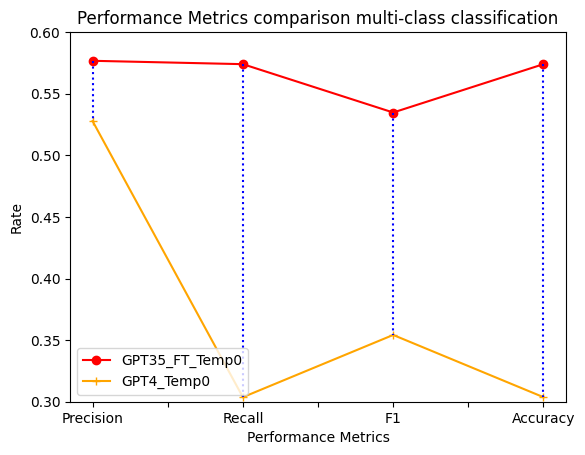

In [1154]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots()

# Plot first line on ax
df3.plot(kind='line', color='r', marker='o', label='Line 1', ax=ax)

# Plot second line on same ax
df2.plot(kind='line', color='orange', marker='+', label='Line 2', ax=ax)

# Get the x and y data for each line
x1 = df3.index
y1 = df3.values
x2 = df2.index
y2 = df2.values

# Draw lines between each x tick
for i in range(len(x1)):
    ax.plot([x1[i], x2[i]], [y1[i], y2[i]], color='b',  linestyle=':')

# Add labels and legend
ax.set_title('Performance Metrics comparison multi-class classification')
ax.set_xlabel('Performance Metrics')
ax.set_ylabel('Rate')
ax.set_ylim(0.3, 0.6)
ax.legend()
plt.savefig('performance_metrics_comparison.png')

plt.show()


In [1155]:
fine_tuned_multi = calculate_performance_multi(df,"GPT35Finetuned")

PTSD
Precision  0.35294117647058826
Recall: 0.28346456692913385
F1 0.314410480349345
TPR 0.28346456692913385
FPR 0.06333973128598848
SCHIZOPHRENIA
Precision  0.3333333333333333
Recall: 0.2916666666666667
F1 0.3111111111111111
TPR 0.2916666666666667
FPR 0.01222707423580786
EATING DISORDER
Precision  0.4090909090909091
Recall: 0.34615384615384615
F1 0.37500000000000006
TPR 0.34615384615384615
FPR 0.011373578302712161
BIPOLAR
Precision  0.5
Recall: 0.23703703703703705
F1 0.32160804020100503
TPR 0.23703703703703705
FPR 0.030947775628626693
AUTISM
Precision  0.5566037735849056
Recall: 0.34705882352941175
F1 0.4275362318840579
TPR 0.34705882352941175
FPR 0.04704704704704705
OCD
Precision  1.0
Recall: 0.07692307692307693
F1 0.14285714285714288
TPR 0.07692307692307693
FPR 0.0
ADHD
Precision  0.6167452830188679
Recall: 0.8408360128617364
F1 0.7115646258503401
TPR 0.8408360128617364
FPR 0.5941499085923218


In [1156]:
df

,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,index,_id,sampled_tweets,ground_truth,true_disorder,Prediction_GPT35Turbo_Multi_TopP1,GPT35TurboBaseTemp0_Multi,Prediction_GPT4_Temp0,GPT35Finetuned,Disorder
0,0,0,0,0,0,0,0,0,0,0,1.423036e+09,"""@USER An absolute legend for this thank you!""...",PTSD,PTSD,NaN,DEPRESSION,DEPRESSION,BIPOLAR,PTSD
1,1,1,1,1,1,1,1,1,1,1,7.686502e+17,"""@USER PLEASE"";""@USER and I are gonna get matc...",PTSD,PTSD,NaN,DEPRESSION,PTSD,BIPOLAR,PTSD
2,2,2,2,2,2,2,2,2,2,2,1.160497e+18,"""@USER Thank you ️"";""@USER Youre so sweet and ...",PTSD,PTSD,NaN,ANXIETY,PTSD,ADHD,PTSD
3,3,3,3,3,3,3,3,3,3,3,1.468382e+18,"""woke up from a dream about one of my middle s...",PTSD,PTSD,NaN,PTSD,PTSD,PTSD,PTSD
4,4,4,4,4,4,4,4,4,4,4,9.996736e+17,"""By fascists they mean anyone who doesn't agre...",PTSD,PTSD,NaN,SCHIZOPHRENIA,PTSD,ADHD,PTSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,1164,1164,1164,1164,1164,1164,1164,1164,2541,2541,2.959316e+09,"""Sally 🤍🤍 we wont forget Angel. HTTPURL"";""@USE...",SCHIZOPHRENIA,SCHIZOPHRENIA,NaN,PTSD,SCHIZOPHRENIA,SCHIZOPHRENIA,SCHIZOPHRENIA
1165,1165,1165,1165,1165,1165,1165,1165,1165,2542,2542,8.529706e+17,"""I can literally feel more lesions developing ...",SCHIZOPHRENIA,SCHIZOPHRENIA,NaN,SCHIZOPHRENIA,"I'm sorry, but I cannot provide a diagnosis or...",ADHD,SCHIZOPHRENIA
1166,1166,1166,1166,1166,1166,1166,1166,1166,2543,2543,1.299459e+18,"""@USER he's so"";""@USER i dont rlly know how to...",SCHIZOPHRENIA,SCHIZOPHRENIA,NaN,SCHIZOPHRENIA,SCHIZOPHRENIA,SCHIZOPHRENIA,SCHIZOPHRENIA
1167,1167,1167,1167,1167,1167,1167,1167,1167,2544,2544,1.404918e+18,"""I like how my brother's friends always have h...",SCHIZOPHRENIA,SCHIZOPHRENIA,NaN,PTSD,SCHIZOPHRENIA,BIPOLAR,SCHIZOPHRENIA


In [1157]:
fine_tuned_multi = calculate_performance_multi(df,"GPT35Finetuned")

PTSD
Precision  0.35294117647058826
Recall: 0.28346456692913385
F1 0.314410480349345
TPR 0.28346456692913385
FPR 0.06333973128598848
SCHIZOPHRENIA
Precision  0.3333333333333333
Recall: 0.2916666666666667
F1 0.3111111111111111
TPR 0.2916666666666667
FPR 0.01222707423580786
EATING DISORDER
Precision  0.4090909090909091
Recall: 0.34615384615384615
F1 0.37500000000000006
TPR 0.34615384615384615
FPR 0.011373578302712161
BIPOLAR
Precision  0.5
Recall: 0.23703703703703705
F1 0.32160804020100503
TPR 0.23703703703703705
FPR 0.030947775628626693
AUTISM
Precision  0.5566037735849056
Recall: 0.34705882352941175
F1 0.4275362318840579
TPR 0.34705882352941175
FPR 0.04704704704704705
OCD
Precision  1.0
Recall: 0.07692307692307693
F1 0.14285714285714288
TPR 0.07692307692307693
FPR 0.0
ADHD
Precision  0.6167452830188679
Recall: 0.8408360128617364
F1 0.7115646258503401
TPR 0.8408360128617364
FPR 0.5941499085923218


In [1158]:

fine_tuned_multi = fine_tuned_multi.sort_index(axis=1)
fine_tuned_multi = fine_tuned_multi.sort_values(by='Disorder')
fine_tuned_multi.set_index("Disorder", inplace=True)

In [1159]:
fine_tuned_multi

,F1,Precision,Recall
Disorder,,,
ADHD,0.711565,0.616745,0.840836
AUTISM,0.427536,0.556604,0.347059
BIPOLAR,0.321608,0.500000,0.237037
EATING DISORDER,0.375000,0.409091,0.346154
OCD,0.142857,1.000000,0.076923
PTSD,0.314410,0.352941,0.283465
SCHIZOPHRENIA,0.311111,0.333333,0.291667


In [1160]:
fine_tuned_multi.reset_index(inplace=True)

In [1161]:
mex = pd.read_csv("MexicanResearchPerClass.csv", sep = ";")
# Rename the "Metric" column to "Disorder"
#mex.rename(columns={'Metric': 'Disorder'}, inplace=True)
mex
# Transpose the DataFrame
mex = mex.set_index('Metric').transpose()
mex.reset_index(inplace=True)
mex.rename(columns={'index': 'Disorder'}, inplace=True)
mex

Metric,Disorder,F1,Precision,Recall
0,ADHD,0.751,0.662,0.867
1,AUTISM,0.524,0.596,0.476
2,BIPOLAR,0.534,0.516,0.565
3,EATING DISORDER,0.429,0.633,0.387
4,OCD,0.460,0.554,0.415
5,PTSD,0.533,0.580,0.497
6,SCHIZOPHRENIA,0.438,0.667,0.350


In [1162]:
df1

,Unigram(U)
Precision,0.688395
Recall,0.764506
F1,0.709923


In [1163]:
df2

,GPT4_Temp0
Precision,0.527804
Recall,0.303678
F1,0.354197
Accuracy,0.303678


In [1164]:
fine_tuned_multi

,Disorder,F1,Precision,Recall
0,ADHD,0.711565,0.616745,0.840836
1,AUTISM,0.427536,0.556604,0.347059
2,BIPOLAR,0.321608,0.500000,0.237037
3,EATING DISORDER,0.375000,0.409091,0.346154
4,OCD,0.142857,1.000000,0.076923
5,PTSD,0.314410,0.352941,0.283465
6,SCHIZOPHRENIA,0.311111,0.333333,0.291667


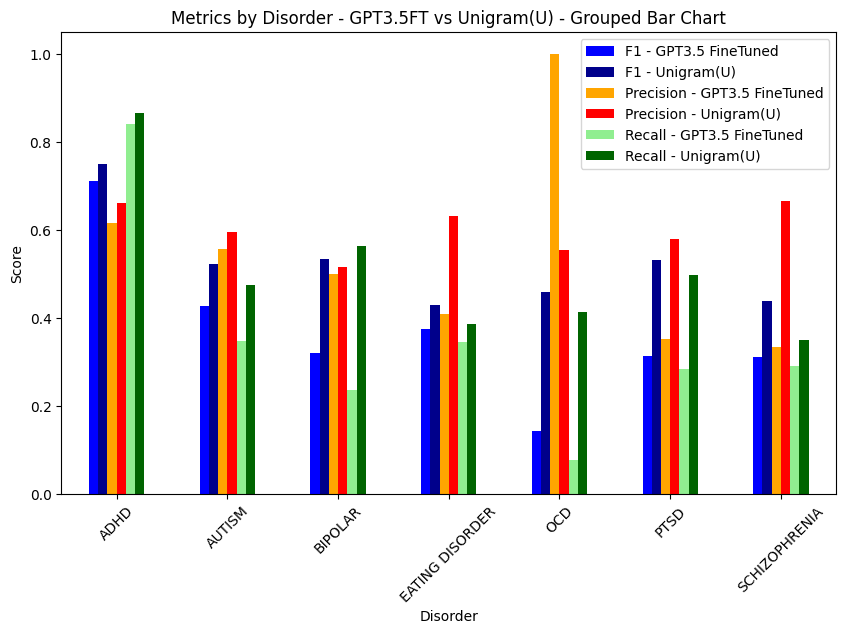

In [1165]:


df2 = pd.DataFrame(mex).set_index('Disorder')
df1 = pd.DataFrame(fine_tuned_multi).set_index('Disorder')

# Merge based on the index
df = df1.merge(df2, left_index=True, right_index=True, suffixes=('_GPT3.5FT', '_Unigram'))

# Plotting
colors = ['blue', 'darkblue', 'orange', 'red', 'lightgreen', 'darkgreen']

df.plot(y=['F1_GPT3.5FT', 'F1_Unigram', 
          'Precision_GPT3.5FT', 'Precision_Unigram',
          'Recall_GPT3.5FT', 'Recall_Unigram'], 
        kind='bar', figsize=(10, 6), color=colors)

plt.legend(labels=['F1 - GPT3.5 FineTuned', 'F1 - Unigram(U)', 
                    'Precision - GPT3.5 FineTuned', 'Precision - Unigram(U)',
                    'Recall - GPT3.5 FineTuned', 'Recall - Unigram(U)'])
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.title('Metrics by Disorder - GPT3.5FT vs Unigram(U) - Grouped Bar Chart') 
plt.savefig('metricsbydisorder_grouped.png', dpi=300)
plt.show()


In [1166]:

df =pd.read_csv("ResultsMulti1901.csv")

In [1167]:

#df.rename(columns={'Prediction_top_k': 'GPT35Finetuned'}, inplace=True)
#df.rename(columns={'Prediction_GPT4_Multi_Temp0': 'Prediction_GPT4_Temp0'}, inplace=True)


In [1168]:
gpt4_performance = calculate_performance_multi(df,"Prediction_GPT4_Temp0")


PTSD
Precision  0.18565400843881857
Recall: 0.3464566929133858
F1 0.24175824175824176
TPR 0.3464566929133858
FPR 0.1852207293666027
SCHIZOPHRENIA
Precision  0.12844036697247707
Recall: 0.5833333333333334
F1 0.2105263157894737
TPR 0.5833333333333334
FPR 0.08296943231441048
EATING DISORDER
Precision  0.06666666666666667
Recall: 0.6538461538461539
F1 0.12099644128113879
TPR 0.6538461538461539
FPR 0.20822397200349957
BIPOLAR
Precision  0.375
Recall: 0.2
F1 0.26086956521739135
TPR 0.2
FPR 0.043520309477756286
AUTISM
Precision  0.5671641791044776
Recall: 0.2235294117647059
F1 0.3206751054852321
TPR 0.2235294117647059
FPR 0.02902902902902903
OCD
Precision  0.3333333333333333
Recall: 0.015384615384615385
F1 0.029411764705882356
TPR 0.015384615384615385
FPR 0.0018115942028985507
ADHD
Precision  0.6750788643533123
Recall: 0.3440514469453376
F1 0.45580404685835996
TPR 0.3440514469453376
FPR 0.1882998171846435


In [1169]:

gpt4_performance = gpt4_performance.sort_index(axis=1)
gpt4_performance = gpt4_performance.sort_values(by='Disorder')
gpt4_performance.set_index("Disorder", inplace=True)

In [1170]:
gpt4_performance.reset_index(inplace=True)

In [1171]:
df5 = pd.DataFrame(gpt4_performance).set_index('Disorder')


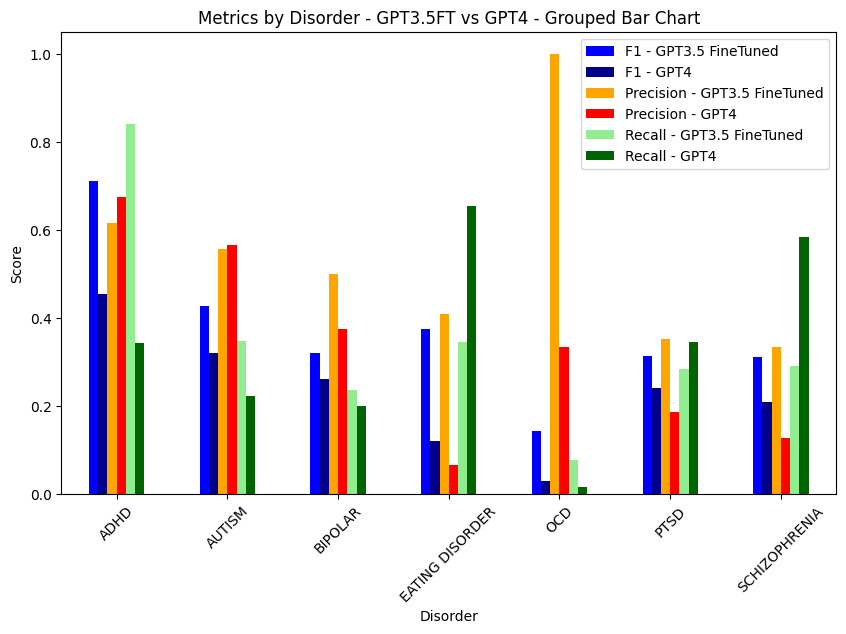

In [1172]:


df2 = pd.DataFrame(mex).set_index('Disorder')
df1 = pd.DataFrame(fine_tuned_multi).set_index('Disorder')

# Merge based on the index
df = df1.merge(df5, left_index=True, right_index=True, suffixes=('_GPT3.5FT', '_GPT4'))

# Plotting
colors = ['blue', 'darkblue', 'orange', 'red', 'lightgreen', 'darkgreen']

df.plot(y=['F1_GPT3.5FT', 'F1_GPT4', 
          'Precision_GPT3.5FT', 'Precision_GPT4',
          'Recall_GPT3.5FT', 'Recall_GPT4'], 
        kind='bar', figsize=(10, 6), color=colors)

plt.legend(labels=['F1 - GPT3.5 FineTuned', 'F1 - GPT4', 
                    'Precision - GPT3.5 FineTuned', 'Precision - GPT4',
                    'Recall - GPT3.5 FineTuned', 'Recall - GPT4'])
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.title('Metrics by Disorder - GPT3.5FT vs GPT4 - Grouped Bar Chart') 
plt.savefig('metricsbydisorder_grouped_gpts.png', dpi=300)
plt.show()
